# Milestone Project 1: Food Vision Big

## Check GPU

* A100
* T4
* V100


In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-e1576e5d-3717-b532-cdcc-97d6530b3dc3)


In [3]:
# Get helper functions (Download helper functions script from JonasHagstrom79/Tensorflow(raw))
!wget https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py



--2024-01-30 19:24:40--  https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13380 (13K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  13.07K  --.-KB/s    in 0s      

2024-01-30 19:24:40 (86.1 MB/s) - ‘helper.py’ saved [13380/13380]



In [4]:
# Import series of helper functions
from helper import create_tensorboard_callback, plot_loss_curves, compare_historys

## Use TensorFlow datasets to download data

If you want to get an overwiev of TensorFlow Datasets (TFDS), read the [guide](https://www.tensorflow.org/datasets/overview)

In [5]:
# Get TensorFllow Datasets
import tensorflow_datasets as tfds
datasets_list = tfds.list_builders() # Get all available datasets in TFDS
print('food101' in datasets_list)

True


In [6]:
# Load in the food101 (takes 5-6 minutes)
(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train', 'validation'],
                                                    shuffle_files=True,
                                                    as_supervised=True, # Data gets returned in tuple format (data, label)
                                                    with_info=True) # Downloads the metadata aswell (ds_info makes it possible)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteP7TPR1/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteP7TPR1/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the Food101 data from TensorFlow Datasets

To become one with our data, we want to find:
* Class names
* The shape of our input data (image tensors)
* The datatype of our inut data
* What the labels look like (e.g are they one-hot encoded or are they label encoded)
* Do the labels match p with the class names?

In [7]:
# Fetures of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [8]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [12]:
# Take one sample of the training data
train_one_sample = train_data.take(1) # Samples are in format (image_tensor, label)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [13]:
# Output info about our trainig sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image datatype: {image.dtype}
  Target class from food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
  """)


  Image shape: (512, 512, 3)
  Image datatype: <dtype: 'uint8'>
  Target class from food101 (tensor form): 23
  Class name (str form): churros
  


In [14]:
# What does our image tensor from TFDS's Food101 loo like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 93,  34,  40],
        [ 93,  34,  40],
        [ 94,  35,  41],
        ...,
        [ 52,  15,  23],
        [ 52,  15,  23],
        [ 52,  15,  23]],

       [[ 93,  34,  40],
        [ 93,  34,  40],
        [ 94,  35,  41],
        ...,
        [ 52,  15,  23],
        [ 52,  15,  23],
        [ 52,  15,  23]],

       [[ 93,  34,  40],
        [ 93,  34,  40],
        [ 94,  35,  41],
        ...,
        [ 54,  14,  23],
        [ 52,  15,  23],
        [ 52,  15,  23]],

       ...,

       [[108,  31,  49],
        [106,  29,  47],
        [105,  28,  46],
        ...,
        [121,  38,  56],
        [122,  39,  59],
        [123,  40,  60]],

       [[107,  30,  48],
        [107,  30,  48],
        [107,  30,  48],
        ...,
        [121,  38,  58],
        [123,  40,  60],
        [123,  40,  60]],

       [[106,  29,  47],
        [108,  31,  49],
        [109,  32,  50],
        ...,
        [123,  40,  6

In [16]:
# What are the min and max values of our image tensor?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=9>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from TensorFlow datasets

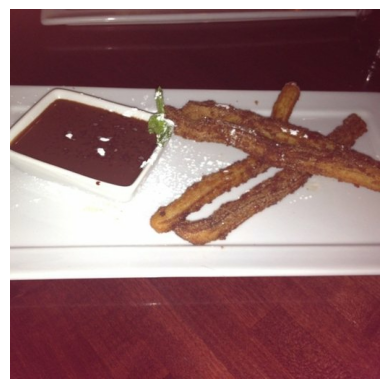

In [17]:
# Plot an image tensor
import matplotlib.pyplot as plt
# Convert the TensorFlow image tensor to NumPy array
image_np = image.numpy()
# Display the image using Matplotlib
plt.imshow(image_np)
plt.axis('off') # Optional: Turn off axis labels
plt.show()

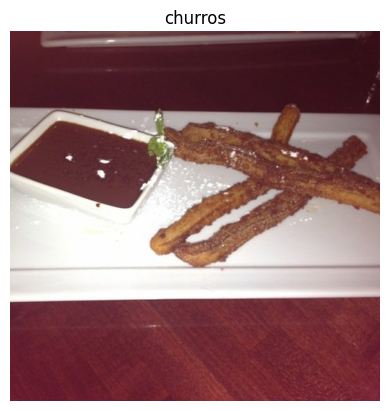

In [19]:
plt.imshow(image)
plt.title(class_names[label.numpy()]) # Add title to image to verify the label is assosciated with the right image
plt.axis(False);

## Create preprocessing functions for our data

Neural networks perform best when data is in a certain way (e.g. batched, normalized, etc).

However, not all data (including data from TensorFlow Datasets) comes like this.

So in order to get it ready for a neural network, you'll often have to write preprocessing functions and map it to your data.

What we know about our data:
* In `uint8` datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255)

What we know models like:
* Data in `float32` dtype (or for mixed precision `float16` and `float32`)
* For batches, TensorFlow likes all of the tensors within a batch to be of the same size
* Scaled (values between 0 & 1) also called normalized tensors generally perform better

With thes points in mind, we've got a few things we can tackle with a preprocessing function.

In [26]:
# Make a function for preprocessing images
def preprocessed_img(image, label, img_shape=224): # Since its a tuple we need image, label
  """
  Converts image datatype from 'uint8' -> 'float32' and reshapes
  image to [img_shape, img_shape, colour_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape]) #reshape target image
  image = image /255.0 # Rescale image to the range [0, 1]
  return tf.cast(image, tf.float32), label # return (float32_image, label) tuple


In [27]:
# Preprocess a single sampple image and check the outputs
preprocessed_img = preprocess_img(image, label)[0] # [0] for the 0th index of the tuple we're returning
print(f"Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n{preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape}, \nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[93 34 40]
  [93 34 40]
  [94 35 41]
  ...
  [52 15 23]
  [52 15 23]
  [52 15 23]]

 [[93 34 40]
  [93 34 40]
  [94 35 41]
  ...
  [52 15 23]
  [52 15 23]
  [52 15 23]]]..., 
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
[[[0.3647059  0.13333334 0.15686275]
  [0.36862746 0.13725491 0.16078432]
  [0.37254903 0.14117648 0.16470589]
  ...
  [0.21568628 0.05882353 0.09411765]
  [0.20392157 0.05882353 0.09019608]
  [0.20392157 0.05882353 0.09019608]]

 [[0.36834735 0.1369748  0.1605042 ]
  [0.36498597 0.13361344 0.15714285]
  [0.36862746 0.13725491 0.16078432]
  ...
  [0.21568628 0.05882353 0.09411765]
  [0.21176471 0.05490196 0.09019608]
  [0.20392157 0.05882353 0.09019608]]]...,
Shape: (224, 224, 3), 
Datatype: <dtype: 'float32'>
